## <p style="text-align: right;"> &#9989; Lee Chungmin</p>

# CMSE 202 Final (Section 3 - Spring 2024)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource! **However: The use of any person-to-person communication software or generative AI tools is absolutely not acceptable.** If you are seen accessing your email, using a collaborative cloud storage or document software (e.g. Slack, Google Documents), or generative AIs (e.g. ChatGPT), you will be at risk for receiving a zero on the exam and the course.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

There are **72 points** possible on this exam. The point breakdowns are in the section headers and within each question.

---
## Part 0: Academic integrity statement (3 points)

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **LEE CHUNGMIN**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam is an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (2 points)

Before you get too far along in the exam, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `final` directory that you just created. Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!

git clone https://github.com/Chungminlee08/cmse202-s24-turnin
cd cmse202-s24-turnin
mkdir final
git status
git add CMSE202-Midterm-Section003-STUDENT.ipynb
git commit -m "Added notebook1"
git push origin main

```

---
## Part 2: Generate a network graph from data (21 points)

In this part of the exam, we will use the faces dataset from scikit-learn and create a graph with faces as nodes and do some analysis. First, run the cell below to load the data. 

In [7]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

from sklearn.datasets import fetch_lfw_people
sk_data = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

feature_vectors = sk_data.data
class_labels = sk_data.target
categories = sk_data.target_names
images = sk_data.images
print(images.shape)  #To check the dimensions of "images"

### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

(1560, 50, 37)


&#9989; **Question 2.1 (2 points)**: Lets only select the first 20 entries or images in the data. First, create a graph named `G` using the `networkx` package with the first 20 images as nodes 0-19. For example, for creating node 10, you should use `.add_node(10,image= images[10])`.

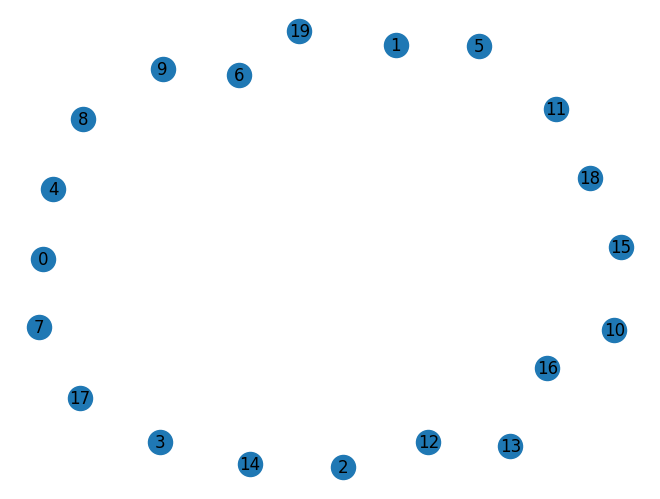

In [8]:
### Put your code for Question 2.1 here.

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with image attributes
for i in range(20):
    G.add_node(i, image=images[i])

# Display the graph (optional)
nx.draw(G, with_labels=True)
plt.show()

&#9989; **Question 2.2 (4 points)**: Use the `distance_matrix` function in `scipy.spatial` to compute the distances between all pairs of images amongst the 20 images. Also include code to import the function.
For each node in graph `G`, only add edges from it to those nodes where the distance between the corresponding images is less than a threshold 8. *You may use loops to check distances from each node/image and add edges.*

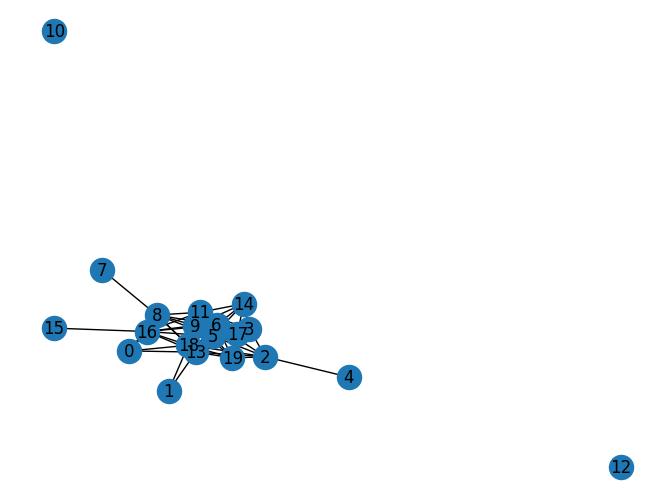

In [14]:
### Put your code for Question 2.2 here.
import numpy as np
from scipy.spatial import distance_matrix

# Compute the distance matrix between all pairs of images
distances = distance_matrix(feature_vectors[:20], feature_vectors[:20])

# Iterate over each pair of nodes and add edges based on the threshold
for i in range(20):
    for j in range(i + 1, 20):
        if distances[i, j] < 8:
            G.add_edge(i, j)

# Display the updated graph (optional)
nx.draw(G, with_labels=True)
plt.show()



&#9989; **Question 2.3 (3 points)**: Now, running the code below will display the graph. Make sure it runs/produces output and briefly explain what the code does (overall explanation, not line by line).

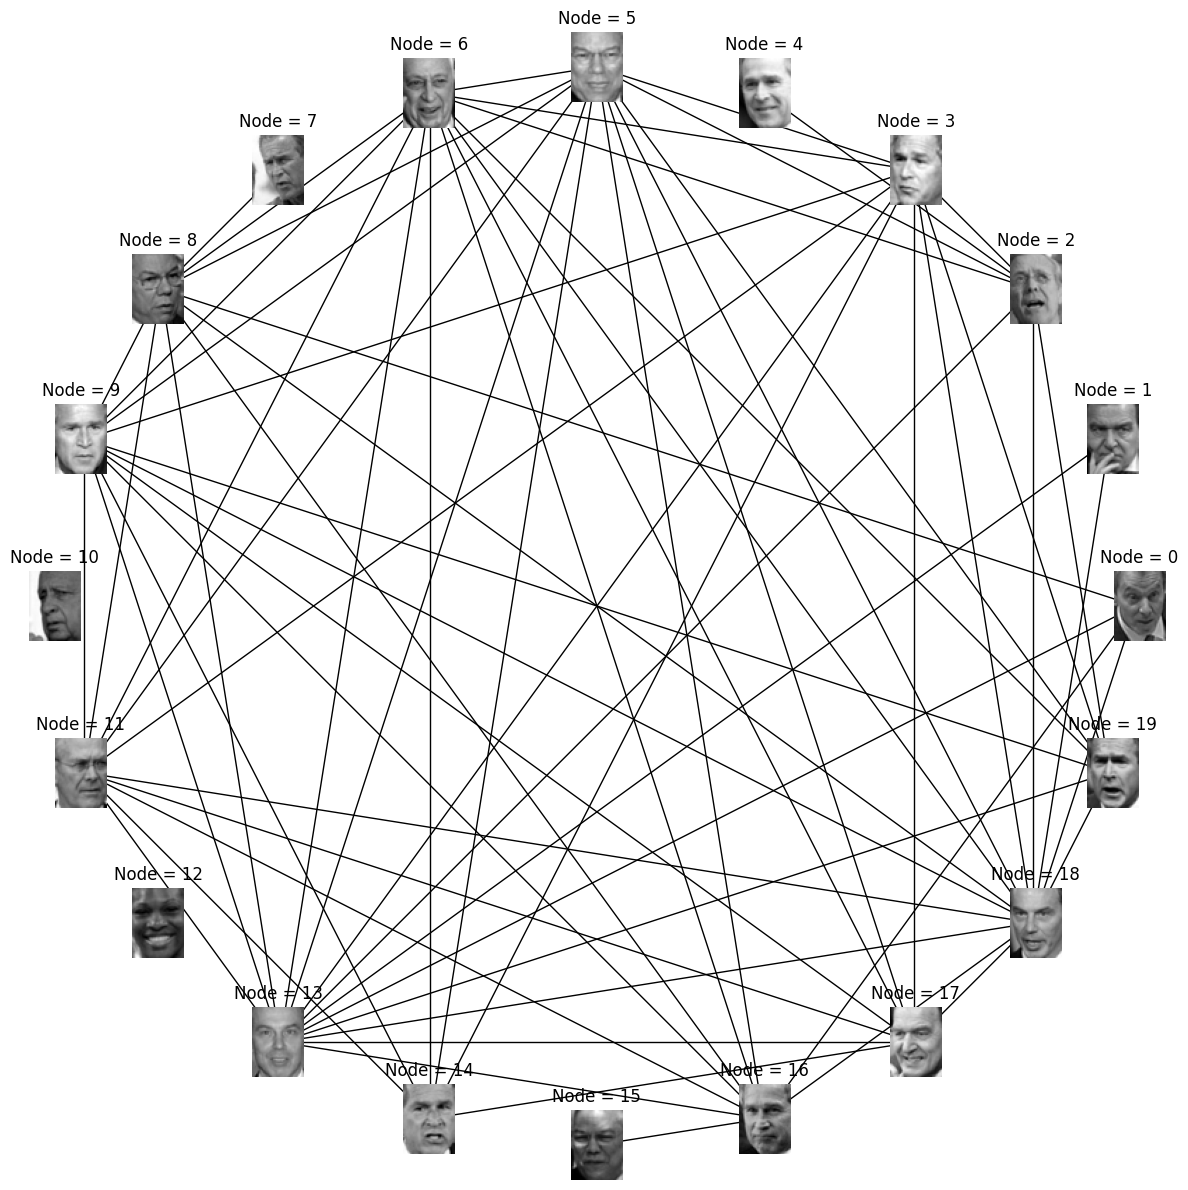

In [15]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

import matplotlib.pyplot as plt

pos=nx.circular_layout(G)

fig=plt.figure(figsize=(14,14))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax)

plt.xlim(-1,1)
plt.ylim(-1,1)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

size=0.05 # image size
p2=size/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, size, size])
    a.set_aspect('equal')
    a.set_title('Node = %i' %n)
    a.imshow(G.nodes[n]['image'],cmap='gray')
    a.axis('off')
ax.axis('off')
plt.show()

### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

<font size=+3>&#9998;</font> **The code provided generates a visualization of the graph G, where each node represents an image from the dataset. It creates a visualization where each node in the graph corresponds to an image, and the images are displayed in a circular layout with their edges connecting them.**

&#9989; **Question 2.4 (2 points)**: Now repeat the steps for Questions 2.1 to 2.3 but with a threshold of 7 for creating the edges. Give the graph here a new name `H`. What is the difference in the displayed graph with the new threshold? Does it have more or fewer edges?

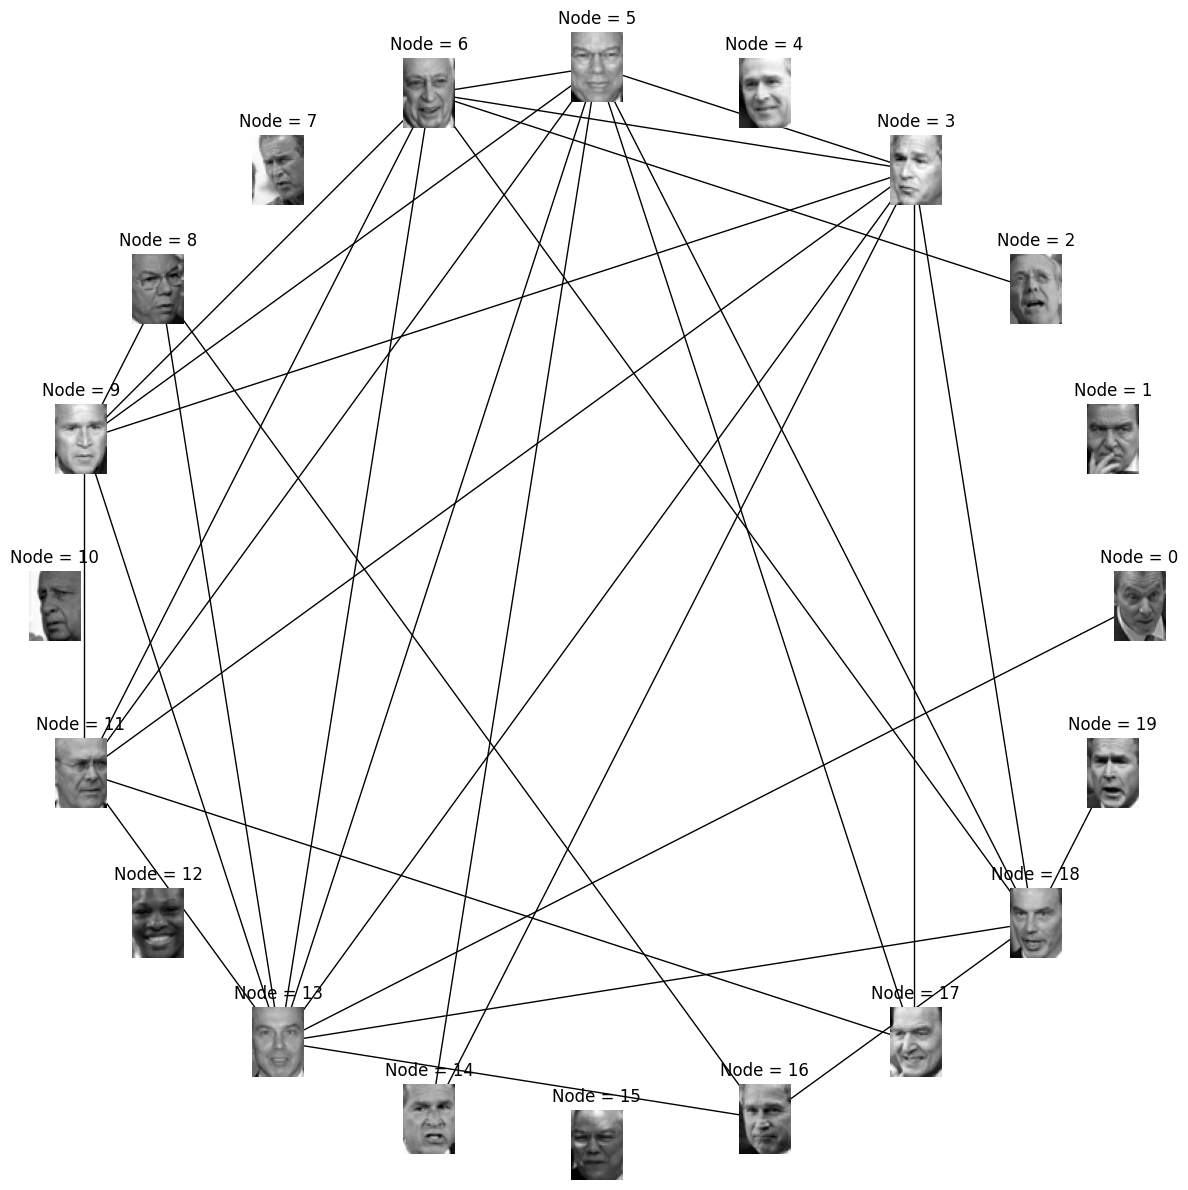

In [16]:
### Put your code for Question 2.4 here

# Create an empty graph
H = nx.Graph()

# Add nodes to the graph with image attributes
for i in range(20):
    H.add_node(i, image=images[i])

# Compute the distance matrix between all pairs of images
distances = distance_matrix(feature_vectors[:20], feature_vectors[:20])

# Iterate over each pair of nodes and add edges based on the threshold
for i in range(20):
    for j in range(i + 1, 20):
        if distances[i, j] < 7:
            H.add_edge(i, j)

# Display the updated graph
pos = nx.circular_layout(H)
fig = plt.figure(figsize=(14,14))
ax = plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(H, pos, ax=ax)
plt.xlim(-1,1)
plt.ylim(-1,1)

trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform

size = 0.05  # image size
p2 = size / 2.0

for n in H:
    xx, yy = trans(pos[n])  # figure coordinates
    xa, ya = trans2((xx, yy))  # axes coordinates
    a = plt.axes([xa - p2, ya - p2, size, size])
    a.set_aspect('equal')
    a.set_title('Node = %i' % n)
    a.imshow(H.nodes[n]['image'], cmap='gray')
    a.axis('off')

ax.axis('off')
plt.show()

&#9989; **Question 2.5 (2 points)**: What is a complete graph? Are the graphs in Questions 2.3 and 2.4 complete graphs?

<font size=+3>&#9998;</font> A complete graph is a graph in which every pair of distinct nodes is connected by a unique edge. In other words, every node in a complete graph is adjacent to every other node.

The graphs in Questions 2.3 and 2.4 are not complete graphs. In Question 2.3, the edges are added between nodes if the distance between their corresponding images is less than 8, and in Question 2.4, the edges are added if the distance is less than 7. Therefore, while these graphs may have multiple edges, they may not connect every pair of distinct nodes.

&#9989; **Question 2.6 (2 points)**: Write `networkx` code to determine how many nodes are connected or adjacent to `node 6` and `node 1` in Graph `G` (in Question 2.3). **You will only get points when writing appropriate code and not for providing the answer otherwise.**

In [17]:
### Put your code for Question 2.6 here

# For node 6
num_neighbors_6 = len(list(G.neighbors(6)))
print("Number of nodes connected to node 6:", num_neighbors_6)

# For node 1
num_neighbors_1 = len(list(G.neighbors(1)))
print("Number of nodes connected to node 1:", num_neighbors_1)

Number of nodes connected to node 6: 12
Number of nodes connected to node 1: 2


&#9989; **Question 2.7 (2 points)**: Use `networkx` to generate the adjacency matrix of Graph `G` (in Question 2.3) and print it.

In [18]:
### Put your code for Question 2.7 here

# Generate the adjacency matrix
adj_matrix_G = nx.adjacency_matrix(G)

# Print the adjacency matrix
print("Adjacency matrix of Graph G:")
print(adj_matrix_G.todense())

Adjacency matrix of Graph G:
[[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1]
 [0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0]
 [0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1]
 [0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0]
 [0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0]
 [1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1]
 [0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0]]


&#9989; **Question 2.8 (4 points)**: For the adjacency matrix provided in the cell below, use `networkx` code to generate the graph corresponding to it and display the graph using a circular layout. Also, use `networkx` code to obtain the `Laplacian matrix` of this graph and print it in a 2D array format. What is the `Laplacian matrix`? You may look up documentation/search online.

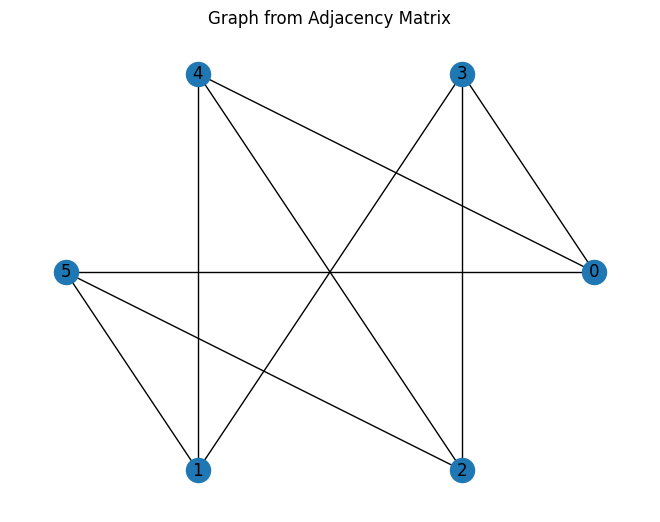

Laplacian matrix:
[[ 3 -1 -1 -1  0  0]
 [-1  3  0  0 -1 -1]
 [-1  0  3  0 -1 -1]
 [-1  0  0  3 -1 -1]
 [ 0 -1 -1 -1  3  0]
 [ 0 -1 -1 -1  0  3]]


In [26]:
### Put your code for Question 2.8 here.

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Provided adjacency matrix
adj = np.array([
    [0,0,0,1,1,1],
    [0,0,0,1,1,1],
    [0,0,0,1,1,1],
    [1,1,1,0,0,0],
    [1,1,1,0,0,0],
    [1,1,1,0,0,0]
])

# Create an empty graph
G = nx.Graph()

# Add edges to the graph based on the adjacency matrix
for i in range(len(adj)):
    for j in range(len(adj[i])):
        if adj[i][j] == 1:
            G.add_edge(i, j)

# Plot the graph using a circular layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Graph from Adjacency Matrix")
plt.show()

# Compute and print the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G).toarray()
print("Laplacian matrix:")
print(laplacian_matrix)


<font size=+3>&#9998;</font> In the mathematical field of graph theory, the Laplacian matrix, also called the graph Laplacian, admittance matrix, Kirchhoff matrix or discrete Laplacian, is a matrix representation of a graph. Named after Pierre-Simon Laplace, the graph Laplacian matrix can be viewed as a matrix form of the negative discrete Laplace operator on a graph approximating the negative continuous Laplacian obtained by the finite difference method.

The Laplacian matrix relates to many useful properties of a graph. Together with Kirchhoff's theorem, it can be used to calculate the number of spanning trees for a given graph. The sparsest cut of a graph can be approximated through the Fiedler vector — the eigenvector corresponding to the second smallest eigenvalue of the graph Laplacian — as established by Cheeger's inequality. The spectral decomposition of the Laplacian matrix allows constructing low dimensional embeddings that appear in many machine learning applications and determines a spectral layout in graph drawing. Graph-based signal processing is based on the graph Fourier transform that extends the traditional discrete Fourier transform by substituting the standard basis of complex sinusoids for eigenvectors of the Laplacian matrix of a graph corresponding to the signal.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**
m
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (21 points)

In this part of the exam, we will work with some California housing data available from `sklearn.datasets`. Read the data in using the code below. You can read more about the data at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing and the linked user guide.

In [12]:
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing.data
prediction_target = housing.target
data_column_names = housing.feature_names
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!
### RUN THIS CELL, BUT DO NOT EDIT IT!!!!!

&#9989; **Question 3.1 (3 points)**: First convert the `data` into a Pandas dataframe with column names as in `data_column_names`. Display the first 8 rows of the dataframe to check if it is displaying correctly. Convert the `prediction_target` which has average house values to a Pandas series. Make sure to use these for subsequent questions.

In [13]:
### Put your code for Question 3.1 here

# Convert data to a Pandas DataFrame with column names
import pandas as pd

housing_df = pd.DataFrame(data, columns=data_column_names)

# Convert prediction_target to a Pandas Series
prediction_target_series = pd.Series(prediction_target, name='Average House Value')

# Display the first 8 rows of the DataFrame
print(housing_df.head(8))
print(prediction_target_series.head(8))


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
Name: Average House Value, dtype: float64


&#9989; **Question 3.2 (4 points)**: Make two scatter plots with the prediction_target data on the $y$-axis of both plots and the x-axis being `HouseAge` and `AveOccup`, respectively. Give both plots a title and label the x and y axes on both plots meaningfully.

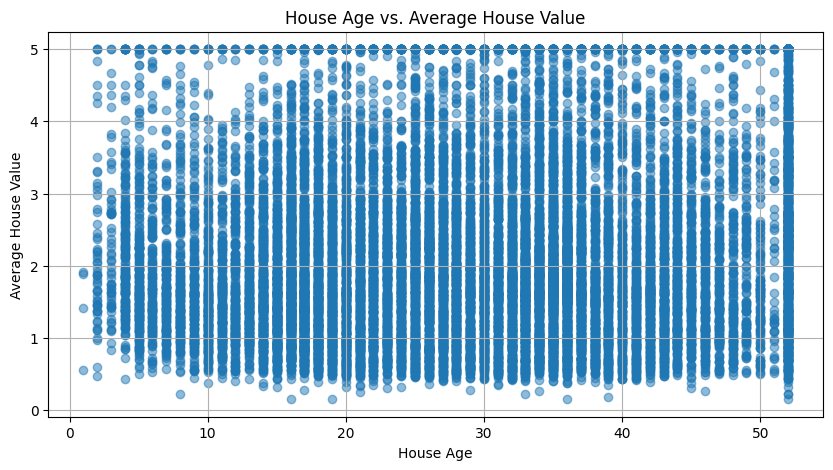

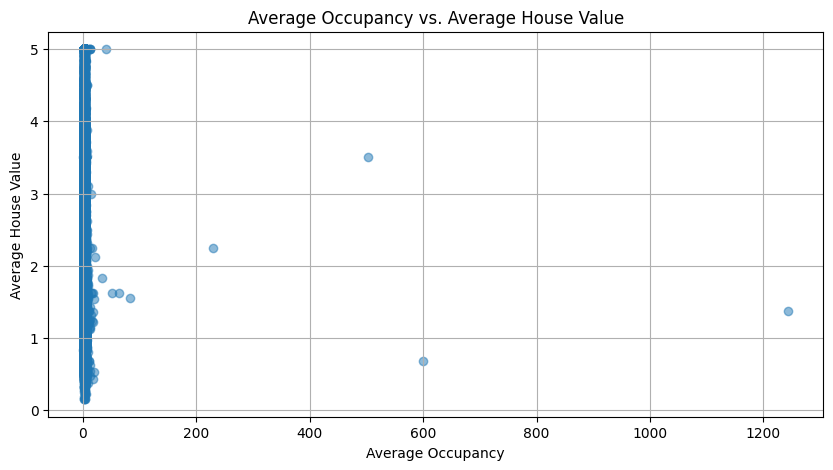

In [22]:
### Put your code for Question 3.2 here

import matplotlib.pyplot as plt

# Scatter plot for HouseAge vs. Average House Value
plt.figure(figsize=(10, 5))
plt.scatter(housing_df['HouseAge'], prediction_target_series, alpha=0.5)
plt.title('House Age vs. Average House Value')
plt.xlabel('House Age')
plt.ylabel('Average House Value')
plt.grid(True)
plt.show()

# Scatter plot for AveOccup vs. Average House Value
plt.figure(figsize=(10, 5))
plt.scatter(housing_df['AveOccup'], prediction_target_series, alpha=0.5)
plt.title('Average Occupancy vs. Average House Value')
plt.xlabel('Average Occupancy')
plt.ylabel('Average House Value')
plt.grid(True)
plt.show()

&#9989; **Question 3.3 (1 point)**: Do you see any outliers in your plot with `AveOccup` data? Do you think linear regression makes sense for predicting the average house value based off either `HouseAge` or `AveOccup`?

<font size=+3>&#9998;</font> I do see some outliers in AveOccup data. However, despite this outliers, I guess linear agression would fit AveOccup better, as the data of HouseAge is more widespread, which is not sufficient for 'linear' regression.

&#9989;  **Question 3.4 (5 points)**: Using the `OLS` method in `statsmodels`, let us perform a multivariable linear regression to predict the average house value (`prediction_target`) based on all the eight features in the data. Use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Display the summary after fitting the model. What are the R-squared and adjusted R-squared values? Comment on the goodness of fit based on those.

In [23]:
### Put your code for Question 3.4 here

import statsmodels.api as sm

# Add a constant term to the features
X = sm.add_constant(housing_df)

# Fit the OLS model
model = sm.OLS(prediction_target_series, X)
results = model.fit()

# Display the summary
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Average House Value   R-squared:                       0.606
Model:                             OLS   Adj. R-squared:                  0.606
Method:                  Least Squares   F-statistic:                     3970.
Date:                 Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                         16:24:23   Log-Likelihood:                -22624.
No. Observations:                20640   AIC:                         4.527e+04
Df Residuals:                    20631   BIC:                         4.534e+04
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.06

<font size=+3>&#9998;</font> 
The R-squared value of the model is 0.606, and the adjusted R-squared value is also 0.606. R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, it indicates that approximately 60.6% of the variance in average house value can be explained by the eight features included in the model.

The adjusted R-squared value takes into account the number of predictors in the model and adjusts the R-squared value accordingly. Since the adjusted R-squared value is very close to the R-squared value, it suggests that the addition of more predictors is not significantly improving the model's explanatory power.

Overall, an R-squared value of 0.606 indicates a moderate level of goodness of fit. While it suggests that the model explains a significant portion of the variance in the average house value, there might still be room for improvement, especially considering the complexity and various factors that influence house prices. Additionally, the model's performance could be further evaluated using other metrics and through validation techniques.

&#9989;  **Question 3.5 (4 points)**: Based on the results above, which feature/variable has the least significant effect on the fit? Redo the OLS fit and results summary dropping this variable. Does the R-squared value change a lot? Which feature (excluding constant) in this fit gets the largest coefficient?

In [24]:
### Put your code for Question 3.5 here

# Get p-values for each coefficient
p_values = results.pvalues[1:]  # Exclude constant

# Find the feature with the highest p-value
least_significant_feature = p_values.idxmax()
print("Least significant feature:", least_significant_feature)

# Redo the OLS fit dropping the least significant feature
X_reduced = X.drop(columns=[least_significant_feature])
model_reduced = sm.OLS(prediction_target_series, X_reduced)
results_reduced = model_reduced.fit()

# Display the summary
print(results_reduced.summary())


Least significant feature: Population
                             OLS Regression Results                            
Dep. Variable:     Average House Value   R-squared:                       0.606
Model:                             OLS   Adj. R-squared:                  0.606
Method:                  Least Squares   F-statistic:                     4538.
Date:                 Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                         16:25:10   Log-Likelihood:                -22624.
No. Observations:                20640   AIC:                         4.526e+04
Df Residuals:                    20632   BIC:                         4.533e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

<font size=+3>&#9998;</font> 
The feature with the least significant effect on the fit, as determined by the highest p-value, is "Population."

After dropping the "Population" feature and refitting the model, the R-squared value remains the same at 0.606. This suggests that removing the least significant feature did not substantially change the overall explanatory power of the model.

In the reduced model, the feature with the largest coefficient (excluding the constant) is "MedInc" (median income). Its coefficient value is 0.4368. This indicates that, among the remaining features, median income has the most significant impact on average house value.

&#9989;  **Question 3.6 (4 points)**: Based on the results in Question 3.5, create three `.graphics.plot_regress_exog` figures, one with respect to `HouseAge`, one with respect to `AveOccup`, and one for `MedInc`. Specify reasonable figure sizes so the figures are large enough to see clearly. Comment on the residuals you observe.

eval_env: 1
eval_env: 1
eval_env: 1


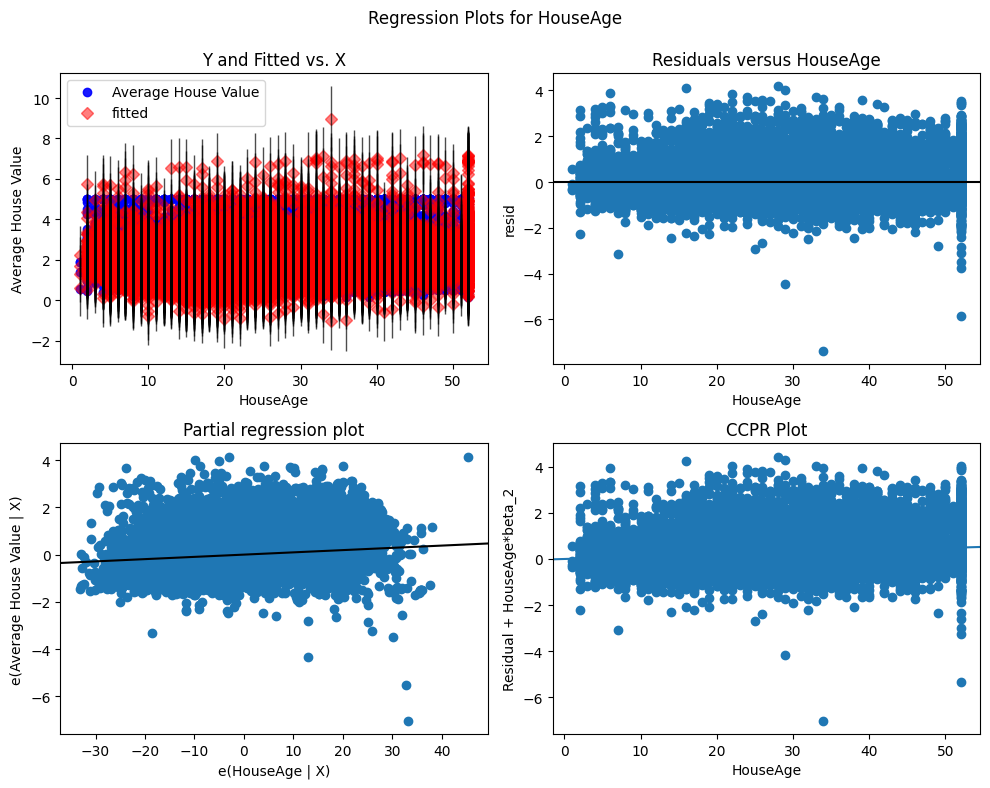

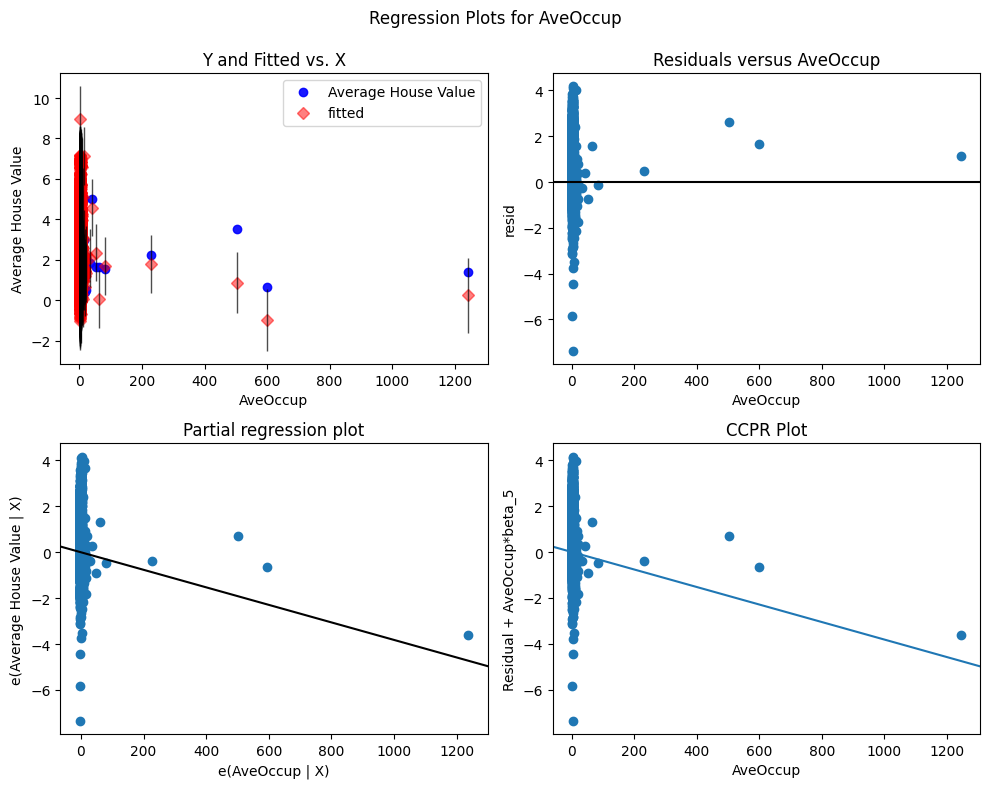

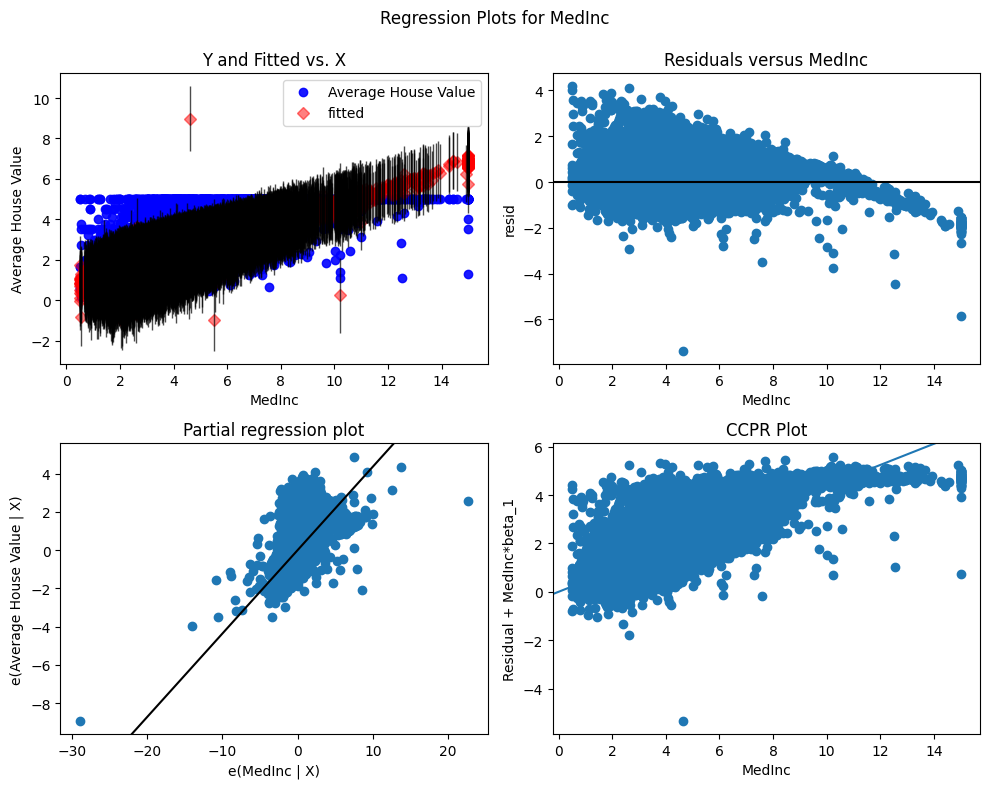

In [25]:
### Put your code for Question 3.6 here

# Create plot_regress_exog figures for HouseAge, AveOccup, and MedInc
fig_houseage = plt.figure(figsize=(10, 8))
fig_aveoccup = plt.figure(figsize=(10, 8))
fig_medinc = plt.figure(figsize=(10, 8))

# Plot for HouseAge
fig_houseage = sm.graphics.plot_regress_exog(results_reduced, 'HouseAge', fig=fig_houseage)

# Plot for AveOccup
fig_aveoccup = sm.graphics.plot_regress_exog(results_reduced, 'AveOccup', fig=fig_aveoccup)

# Plot for MedInc
fig_medinc = sm.graphics.plot_regress_exog(results_reduced, 'MedInc', fig=fig_medinc)

plt.show()


<font size=+3>&#9998;</font> After observing the residuals, we can comment on their distribution and pattern. Residuals that are randomly scattered around zero with no apparent pattern indicate a good fit. If there's a pattern or systematic deviation, it suggests that the model might not capture all the information in the data, indicating areas for improvement.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (25 points)

In this part of the exam, we will use a support vector machine (SVM) classifier to classify features from 7 different types of beans. The dataset and information is available at https://www.kaggle.com/datasets/nimapourmoradi/dry-bean-dataset-classification and the CSV file can be downloaded at https://raw.githubusercontent.com/ravisha3/CMSE202Spring2024Section3Final/main/Dry_Bean_Dataset.csv 

&#9989; **Question 4.1 (3 points)**: Write the jupyter notebook command to download the CSV file from the github link above to your directory. Read the data using Pandas and display its first 8 rows.

In [32]:
### Put your code for Question 4.1 here

!curl -O https://raw.githubusercontent.com/ravisha3/CMSE202Spring2024Section3Final/main/Dry_Bean_Dataset.csv

data = pd.read_csv('Dry_Bean_Dataset.csv')
data.head(8)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2426k  100 2426k    0     0  4563k      0 --:--:-- --:--:-- --:--:-- 4587k


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER


&#9989; **Question 4.2 (4 points)**: Write code to display how many features (exclude labels) and how many samples are there in the dataset. There are 7 classes: `SEKER`, `BARBUNYA`, `BOMBAY`, `CALI`, `HOROZ`, `SIRA`, `DERMASON`. Turn these labels into respective numbers from 1-7 and save the data in a new dataframe. 

In [34]:
### Put your code for Question 4.2 here

# Display number of features and samples
num_features = len(data.columns) - 1  # Exclude the label column
num_samples = len(data)
print("Number of features (excluding labels):", num_features)
print("Number of samples:", num_samples)

# Create a dictionary to map class labels to numbers
class_mapping = {
    'SEKER': 1,
    'BARBUNYA': 2,
    'BOMBAY': 3,
    'CALI': 4,
    'HOROZ': 5,
    'SIRA': 6,
    'DERMASON': 7
}

# Replace class labels with numbers
data['Class'] = data['Class'].map(class_mapping)

# Display the first 8 rows of the modified dataframe
data.head(8)


Number of features (excluding labels): 16
Number of samples: 13611


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,1
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,1
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,1
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,1
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,1
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,1
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,1


Now that the data is properly loaded into Python, we need to perform a **train-test-split** so that we can build our SVM classifier and test it.

&#9989; **Question 4.3 (4 points)**: **Use the `train_test_split()` method** from `sklearn.model_selection` like we did in class. Use a `train_size` of `0.8` and `random_state` of `161803`. You should now have a training and a testing set with "labels" and "features" each. Finally, **print the shape of your training features, training labels, testing features, and testing labels** to verify that your train-test-split did what it was supposed to. Make sure labels (train and test) have the right (integer) data type or convert them to it.

In [35]:
### Put your code for Question 4.3 here.

from sklearn.model_selection import train_test_split

# Splitting the dataset into features and labels
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Labels

# Convert labels to integer data type
y = y.astype(int)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=161803)

# Print the shape of training and testing sets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing features shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (10888, 16)
Training labels shape: (10888,)
Testing features shape: (2723, 16)
Testing labels shape: (2723,)


&#9989; **Question 4.4 (6 points)**: **Now Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=10.` Then **fit your training set** and use the resulting fit to **predict your the testing set** so you get predicted labels for the testing set. Finally, **print the fit statistics** using the `confusion_matrix()` and `classification_report()` methods.

In [37]:
### Put your code for Question 4.4 here

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Splitting the data into features (X) and labels (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting SVM classifier with linear kernel and C=10
svm_classifier = SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

# Predicting labels for the testing set
y_pred = svm_classifier.predict(X_test)

# Printing fit statistics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[384   7   0   0   0  10  12]
 [  1 229   0  24   1   6   0]
 [  0   0 117   0   0   0   0]
 [  0   9   0 301   4   3   0]
 [  0   3   0   3 391   5   6]
 [ 10   1   0   1   6 467  51]
 [  9   0   0   0   1  51 610]]

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       413
           2       0.92      0.88      0.90       261
           3       1.00      1.00      1.00       117
           4       0.91      0.95      0.93       317
           5       0.97      0.96      0.96       408
           6       0.86      0.87      0.87       536
           7       0.90      0.91      0.90       671

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



&#9989; **Question 4.5 (5 points)**: Answer the following questions regarding the confusion matrix and classification report:  
* Would you consider this a good or a bad classifier based on the statistics? Explain briefly. (2 points)
* What is the confusion matrix showing? (1 point)
* What are the ranges of the precision values and recall values above across classes? (2 points)

<font size=+3>&#9998;</font>
1. Classifier Evaluation: Overall, this classifier seems to perform reasonably well. The accuracy is 92%, and the precision, recall, and F1-score values are relatively high across classes. However, it's essential to consider the specific context and requirements of the classification task to determine whether it's good or bad. For example, in some contexts, even higher accuracy may be required, while in others, a slightly lower accuracy might be acceptable.

2. Confusion Matrix: The confusion matrix shows the number of true positive, false positive, true negative, and false negative predictions for each class. Each row of the matrix represents the actual class, while each column represents the predicted class. For example, the entry at row 1, column 2, indicates the number of instances of class 1 that were predicted as class 2.

3. Ranges of Precision and Recall:
Precision ranges from 0.86 to 1.00 across classes.
Recall ranges from 0.87 to 1.00 across classes.
Precision measures the ratio of true positive predictions to the total number of positive predictions, while recall measures the ratio of true positive predictions to the total number of actual positive instances. Higher values of precision and recall indicate better performance. In this case, the precision and recall values are relatively high across classes, indicating that the classifier performs well in terms of both precision and recall.

&#9989; **Question 4.6 (3 points)**: Answer the following questions:  
* If you are a tumor surgeon wanting to avoid operating on healthy subjects at all costs (based on classifier that says patient with tumor or not), would you want high precision or high recall? (1 point)
* Apart from the linear kernel, what other kernel(s) did you learn for SVM in class? (1 point)
* What trade-off does tuning the `C` hyperparameter in `sklearn SVC` class help achieve? (1 point)

<font size=+3>&#9998;</font>

1. Preference for Tumor Surgeon: If you are a tumor surgeon wanting to avoid operating on healthy subjects at all costs, you would prioritize high precision. Precision measures the ratio of true positive predictions to the total number of positive predictions. In the context of tumor surgery, high precision would mean that when the classifier predicts a patient as having a tumor, it is highly likely that the patient actually has a tumor, minimizing the chance of operating on healthy subjects.

2. Other Kernels for SVM: Apart from the linear kernel, other commonly used kernels for SVM include:
Polynomial kernel
Radial Basis Function (RBF) kernel
Sigmoid kernel

3. Trade-off achieved by tuning C hyperparameter: Tuning the C hyperparameter in the sklearn SVC class helps achieve a trade-off between model simplicity (smooth decision boundary) and classification accuracy. The C hyperparameter controls the regularization strength, where smaller values of C lead to a softer margin, allowing more margin violations (misclassifications) but potentially improving generalization to unseen data. On the other hand, larger values of C result in a harder margin, which aims to minimize misclassifications on the training data, potentially leading to overfitting. Thus, tuning the C hyperparameter helps balance the bias-variance trade-off in SVM models.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.